In [1]:
!which ipython

/home/rio/miniconda3/envs/multibind/bin/ipython


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import mubind as mb
import numpy as np
import pandas as pd
import torch
import bindome as bd
bd.constants.ANNOTATIONS_DIRECTORY = '/mnt/c/Users/ignacio.ibarra/Dropbox/annotations'
# mb.models.Mubind
import torch.optim as topti
import torch.utils.data as tdata
import matplotlib.pyplot as plt
import logomaker

# Use a GPU if available, as it should be faster.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device: " + str(device))

/home/rio/miniconda3/envs/multibind/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda:0


In [4]:
bd.bindome.datasets.SELEX.get_data?

Signature: bd.bindome.datasets.SELEX.get_data(accession=None)
Docstring: <no docstring>
File:      /mnt/c/Users/ignacio.ibarra/Dropbox/workspace/theislab/bindome/bindome/datasets/selex.py
Type:      function


In [5]:
import os

In [6]:
data = bd.bindome.datasets.SELEX.get_data(accession='cardiac_complexes')
# data[data['cycle'] == 'AF']

data = data[~data['filename'].str.endswith('.xlsx')]
metadata = pd.read_excel(os.path.join(bd.constants.ANNOTATIONS_DIRECTORY, 'selex', 'cardiac_complexes', 'SAMPLE_INFO.xlsx'))
data = data.merge(metadata, on='filename')
data['cycle'] = data['Round']
data['library'] = data['filename'].str.split('.txt.gz').str[0].str.split('_').str[-1]
data = data[['filename', 'cycle', 'tf.name', 'accession', 'library']]

cardiac_complexes
# filenames 22
PRJEB14744
PRJEB20112
PRJEB3289
PRJEB9797


In [7]:
import os

All TF's, using subsets of only round 0 and 1

In [8]:
# %time np.array([mb.tl.onehot_mononuc(row['seq'], le, oe) for index, row in next_data.head(10000).iterrows()]).shape

In [9]:
# %time next_data.head(10000)['seq'].apply(mb.tl.onehot_mononuc, args=(le, oe)) # (row['seq'], le, oe) for index, row in next_data.head(10).iterrows()])

In [10]:
import copy

In [11]:
data

,filename,cycle,tf.name,accession,library
0,GATA4TBX5_R1_R46_016_999.txt.gz,1,GATA4TBX5,cardiac_complexes,999
1,GATA4TBX5_R2_R46_033_999.txt.gz,2,GATA4TBX5,cardiac_complexes,999
2,GATA4TBX5_R3_R46_051_999.txt.gz,3,GATA4TBX5,cardiac_complexes,999
3,GATA4_R1_R46_032_777.txt.gz,1,GATA4,cardiac_complexes,777
4,GATA4_R2_R46_046_777.txt.gz,2,GATA4,cardiac_complexes,777
5,GATA4_R3_R46_054_777.txt.gz,3,GATA4,cardiac_complexes,777
6,NKX2-5GATA4_R1_R46_036_777.txt.gz,1,NKX2-5GATA4,cardiac_complexes,777
7,NKX2-5GATA4_R2_R46_048_777.txt.gz,2,NKX2-5GATA4,cardiac_complexes,777
8,NKX2-5GATA4_R3_R46_056_777.txt.gz,3,NKX2-5GATA4,cardiac_complexes,777
9,NKX2-5TBX5_R1_R46_067_888.txt.gz,1,NKX2-5TBX5,cardiac_complexes,888


In [13]:
import copy

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [16]:
import timeit


In [17]:
data

,filename,cycle,tf.name,accession,library
0,GATA4TBX5_R1_R46_016_999.txt.gz,1,GATA4TBX5,cardiac_complexes,999
1,GATA4TBX5_R2_R46_033_999.txt.gz,2,GATA4TBX5,cardiac_complexes,999
2,GATA4TBX5_R3_R46_051_999.txt.gz,3,GATA4TBX5,cardiac_complexes,999
3,GATA4_R1_R46_032_777.txt.gz,1,GATA4,cardiac_complexes,777
4,GATA4_R2_R46_046_777.txt.gz,2,GATA4,cardiac_complexes,777
5,GATA4_R3_R46_054_777.txt.gz,3,GATA4,cardiac_complexes,777
6,NKX2-5GATA4_R1_R46_036_777.txt.gz,1,NKX2-5GATA4,cardiac_complexes,777
7,NKX2-5GATA4_R2_R46_048_777.txt.gz,2,NKX2-5GATA4,cardiac_complexes,777
8,NKX2-5GATA4_R3_R46_056_777.txt.gz,3,NKX2-5GATA4,cardiac_complexes,777
9,NKX2-5TBX5_R1_R46_067_888.txt.gz,1,NKX2-5TBX5,cardiac_complexes,888


In [18]:
import gc; gc.collect()

178

In [37]:
# update main object to skip reading again in future iterations
def update_dict(d1, d2):
    for k in list(d2.keys()):
        if not k in d1:
            d1[k] = d2[k]
        else:
            d2[k] = d1[k]


In [19]:
reads_tf = {}
reads_zero = {}

NKX2-5TBX5
NKX2-5TBX5 888
3 2
3
Loading dataset # features = 4361801
Loading time: (s) 0.142073
next w 14
kernel to optimize 0
Epoch:  1, Loss: 18.908
Epoch: 11, Loss: 18.908
before shift optim.


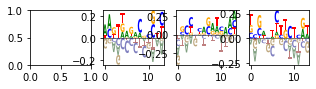

after shift optimz model


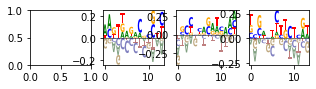


kernel to optimize 1
Epoch:  1, Loss: 18.908
Epoch: 11, Loss: 18.908
before shift optim.


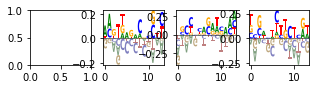

optimize_motif_shift (once)...18.908252716064453 18.908252716064453 18.908252716064453
after shift optimz model


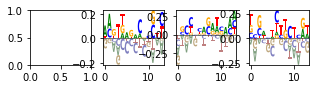


kernel to optimize 2
Epoch:  1, Loss: 18.908
Epoch: 11, Loss: 18.908
before shift optim.


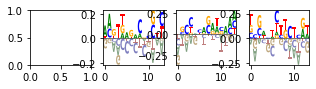

optimize_motif_shift (once)...18.908252716064453 18.908252716064453 18.908252716064453
after shift optimz model


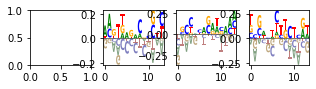


kernel to optimize 3
Epoch:  1, Loss: 18.908
Epoch: 11, Loss: 18.908
before shift optim.


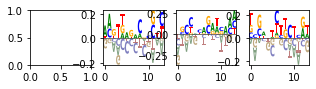

optimize_motif_shift (once)...18.908252716064453 18.908252716064453 18.908252716064453
after shift optimz model


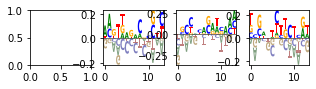

In [52]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 5, 1

num_epochs = 500
early_stopping = 15
log_each = 25
res = []
model_by_k = {}

for tf in set(data['tf.name']):
    if 'ZERO' in tf:
        continue
    if tf != 'NKX2-5TBX5':
        continue
    print(tf)
    
    for library, grp in data.groupby('library'):
        if library != '888':
            continue
        print(tf, library)
        
        reads_tf_next, reads_zero_next = mb.bindome.datasets.SELEX.load_tf_and_zero_reads(tf, data, library=library,
                                                                                          fastq=False, k_skip=reads_tf.keys())
        
        # update main object to skip reading again in future iterations
        update_dict(reads_tf, reads_tf_next)
        update_dict(reads_zero, reads_zero_next)
        
        for k_r0 in reads_zero_next:

            k_model = tf + ':' + k_r0
            # print(k_r0, k_tf, k_model)

            n_rounds = len(reads_tf_next.keys())
            print(n_rounds)
            
            # combine all the positive round data
            df2 = []
            for k in reads_tf_next.keys():
                df = reads_tf_next[k]
                df['k'] = k
                df2.append(df)
            df = pd.concat(df2)
            df = df.pivot('seq', 'k', 'counts').fillna(0).reset_index()
            seqlen = list(df['seq'].str.len())[0]
            
            next_data = reads_zero_next[k_r0].merge(df, on='seq', how='outer').fillna(0) # .astype(int)
            
            new_cols = ['seq', k_r0] + list(df.columns[1:])
            next_data.columns = new_cols
            for i, k in enumerate(next_data.columns[1:]):
                next_data[k] = next_data[k].astype(int)
                next_data[i] = next_data[k].astype(int)
                
            next_data['sum'] = next_data[[i for i in range(1, n_rounds + 1)]].sum(axis=1).values
            next_data = next_data.sort_values('sum', ascending=False)
            
            next_data['batch'] = 1
            next_data['is_count_data'] = 1

            print('Loading dataset # features =', next_data.shape[0])
            start = timeit.default_timer()
            next_data = next_data.head(10000).reset_index(drop=True)
            dataset = mb.datasets.SelexDataset(next_data, n_rounds=n_rounds, single_encoding_step=True)
            stop = timeit.default_timer()
            print('Loading time: (s)', '%.6f' % (stop - start))

            train = tdata.DataLoader(dataset=dataset, batch_size=10000, shuffle=True)
            train_test = tdata.DataLoader(dataset=dataset, batch_size=1, shuffle=False)                
            
            model_by_k_next, res_next = mb.tl.train_iterative(train, device, min_w=10, max_w=15, n_rounds=n_rounds)                
            update_dict(model_by_k, model_by_k_next)
            res += res_next